In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score



In [86]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


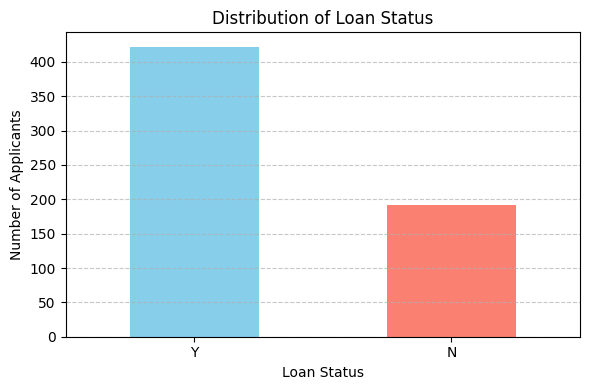

In [87]:

plt.figure(figsize=(6, 4))
loan_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [88]:
df = df.dropna()


In [89]:
X = df.drop(columns=['Loan_Status'])
Y = df['Loan_Status']

In [90]:
X_encoded = X.copy()
le_dict = {}

In [91]:
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_dict[col] = le

In [92]:
le_target = LabelEncoder()
Y_encoded = le_target.fit_transform(Y)


In [93]:
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y_encoded, test_size=0.3, random_state=42)


In [120]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()




X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [115]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [116]:
Y_pred = knn.predict(X_test_scaled)

In [123]:
print("Accuracy FOR TEST:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy FOR TEST: 0.7847222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.46        44
           1       0.76      1.00      0.87       100

    accuracy                           0.78       144
   macro avg       0.88      0.65      0.66       144
weighted avg       0.84      0.78      0.74       144



In [122]:
y_train_pred = knn.predict(X_train_scaled)
train_acc = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

Training Accuracy: 0.8095


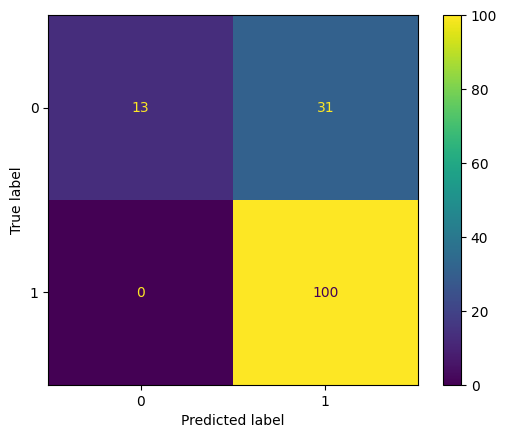

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
